In [23]:
import pickle 
import csv 
import random 
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import decimal 

In [24]:
with open('graph.pkl', 'rb') as f:
    G = pickle.load(f) 

with open('self_def_commus.pkl', 'rb') as f:
    self_def_commus = pickle.load(f)


In [25]:
#for i in G : 
#    if "4932.YMR207C" == i : 
#        print(i) 

In [26]:
with open('comm_func_similar.pkl', 'rb') as f:
    comm_func_similar = pickle.load(f)

In [27]:
with open('paddings.pkl', 'rb') as f:
    paddings = pickle.load(f)

In [28]:
with open('all_node_info.pkl', 'rb') as f:
    all_node_info = pickle.load(f)

In [29]:
def tmp_GG(path , limits , G=G , denses=self_def_commus , all_node_info=all_node_info , comm_func_similar=comm_func_similar) : 
    ccolours = ["#ff0000" , "#33ffff" , "#0000ff"] 
    node_list = [] 
    commus_pack = [] 
    essen_edges = [] 
    for i in path : 
        for ii in path : 
            if (i , ii) in G.edges() : 
                essen_edges.append( (i , ii) ) 
            if (ii , i) in G.edges() : 
                essen_edges.append( (ii , i) ) 
    

    for i in path : 
        idx = 0 
        for ii in denses : 
            if i in ii : 
                commus_pack.append(idx) 
            idx += 1 
    #print(commus_pack) 
    
    for i in commus_pack : 
        node_list += denses[i] 

    tmp_c = 0 
    stars = [] 
    ############# 
    for i in comm_func_similar : 
        if int(i.split(" ")[-1]) - 1 in commus_pack : 
            #print("Flag") 
            for ii in comm_func_similar[i]["Linking Path"] : 
                for iii in ii : 
                    stars.append(iii) 

    print("Stars" , len(stars)) 
    
    sub_G = G.subgraph(node_list + stars) 
    A_G = G.subgraph(denses[commus_pack[0]]) 
    B_G = G.subgraph(denses[commus_pack[-1]]) 
    S_G = G.subgraph(stars) 


    LAG = [] 
    LBG = [] 
    LSG = [] 
    for i in A_G.edges() : 
        if i in essen_edges : 
            LAG.append(2) 
        else : 
            LAG.append(0.0) 
    for i in B_G.edges() : 
        if i in essen_edges : 
            LBG.append(2) 
        else : 
            LBG.append(0.0) 
    for i in S_G.edges() : 
        if i in essen_edges : 
            LSG.append(2) 
        else : 
            LSG.append(0.0) 
    print(len(sub_G)) 
            


    #nx.draw(sub_G) 
    #nx.draw(commu_G , pos=pos , with_labels=1 , font_size = 7 , width=tmp_width , alpha = 0.7 , node_color=tmp_colour , node_size=tmp_size) 
    #pos = nx.spring_layout(sub_G) 
    #pos = nx.circular_layout(sub_G) 
    #pos = nx.shell_layout(sub_G) 
    pos = nx.spring_layout(sub_G) 
    #pos = nx.kamada_kawai_layout(sub_G) 
    #pos = nx.spiral_layout(sub_G) 


    tmp_commus = [self_def_commus[0] , stars , self_def_commus[18]] 
    for i in tmp_commus : 
        print(len(i)) 
    supergraph = nx.cycle_graph(len(tmp_commus))
    superpos = nx.spring_layout(G, scale=22) 

    centers = list(superpos.values()) 
    centres = [[1,1] , [1,-1] , [-1,-1]] 
    pos = {}
    for center, comm in zip(centers, tmp_commus):
        pos.update(nx.spring_layout(nx.subgraph(G, comm), center=center))

    for i in tmp_commus : 
        nx.draw_networkx_nodes(G, pos=pos, nodelist=i , node_color=ccolours[tmp_commus.index(i)], node_size=22)
    
    nx.draw_networkx_edges(G, pos=pos , edgelist=B_G.edges() , width=LBG) 
    nx.draw_networkx_edges(G, pos=pos , edgelist=S_G.edges() , width=LSG) 
    nx.draw_networkx_edges(G, pos=pos , edgelist=A_G.edges() , width=LAG) 
    nx.draw_networkx_edges(G, pos=pos , edgelist=essen_edges , width=2) 
    #plt.tight_layout()
    plt.show()

        
    
    #nx.draw_networkx_nodes(sub_G , pos=pos , alpha = 0.7 , node_color=ccolour_map , node_size=no_size_map) 
    #nx.draw_networkx_edges(sub_G , pos=pos , width=l_thick_map , alpha = 0.7 , edge_color=l_color_map) 
    #nx.draw(sub_G , pos=pos , width=l_thick_map , alpha = 0.7 , node_color=ccolour_map , node_size=no_size_map , edge_color=l_color_map) 

In [30]:
def tmp_G(path , limits , G=G , denses=self_def_commus , all_node_info=all_node_info , comm_func_similar=comm_func_similar) : 
    ccolours = ["#ff0000" , "#33ffff" , "#0000ff"] 
    node_list = [] 
    commus_pack = [] 
    essen_edges = [] 

    for i in range(len(path) - 1) : 
        essen_edges.append( (path[i] , path[i+1]) ) 
        essen_edges.append( (path[-(i+1)] , path[-(i+2)]) ) 

    for i in path : 
        idx = 0 
        for ii in denses : 
            if i in ii :  
                commus_pack.append(idx) 
            idx += 1 
    
    
    for i in commus_pack : 
        node_list += denses[i] 
    new_limits = [] 
    for i in all_node_info : 
        if commus_pack[0] in all_node_info[i][2] and commus_pack[-1] in all_node_info[i][2] : 
            new_limits.append(i) 
    #for i in comm_func_similar : 


    tmp_commus = [denses[commus_pack[0]] , new_limits , denses[commus_pack[-1]] ] 
    
    sub_GG = G.subgraph( denses[commus_pack[0]] + new_limits + denses[commus_pack[-1]] ) 
    true_essen_edges = [] 
    for i in essen_edges : 
        if i in sub_GG.edges() : 
            #print("V" , i) 
            true_essen_edges.append(i) 
        else : 
            #print("X" , i) 
            pass 

    ccolour_map = [] 
    node_sz_map = [] 
    pos = {} 
    labs = {} 
    for i in sub_GG : 
        if i in path : 
            labs[i] = i 
        else : 
            labs[i] = "" 
        if i in tmp_commus[-1] : 
            tmp_x = 100*random.randrange(0, 1000)/1000 
            tmp_y = 100*random.randrange(0, 1000)/1000 
            pos[i] = [-300 + tmp_x ,-300+tmp_y] 
            ccolour_map.append("blue") 
            if i in path : 
                node_sz_map.append(222) 
                continue 
            node_sz_map.append(55) 
        elif i in tmp_commus[0] : 
            tmp_x = 100*random.randrange(0, 1000)/1000 
            tmp_y = 100*random.randrange(0, 1000)/1000 
            pos[i] = [300 + tmp_x ,300 + tmp_y] 
            ccolour_map.append("red") 
            if i in path : 
                node_sz_map.append(222) 
                continue 
            node_sz_map.append(49) 
        elif i in tmp_commus[1] : 
            tmp_r = (-1)**(random.randint(0,1)) * 300 * random.randrange(0,1000)/1000 
            tmp_lx = tmp_r 
            tmp_ly = -tmp_r
            tmp_x = tmp_lx + (-1)**(random.randint(0,1)) * 100*random.randrange(0, 10000)/10000 
            tmp_y = tmp_ly + (-1)**(random.randint(0,1)) * 100*random.randrange(0, 10000)/10000 
            #tmp_dis = [ [-100 + tmp_x , 100 + tmp_y] , [0 + tmp_x , 0 + tmp_y] , [100 + tmp_x , -100 + tmp_y]  ] 
            #pos[i] = tmp_dis[random.randint(0,2)]
            pos[i] = [tmp_x , tmp_y] 
            ccolour_map.append("cyan") 
            if i in path : 
                node_sz_map.append(222) 
                continue 
            node_sz_map.append(2) 
        
            
    print(len(tmp_commus[-1]))  
    nx.draw_networkx_nodes(sub_GG , pos=pos , node_color=ccolour_map , node_size=node_sz_map , alpha=0.3 , label=50) 
    nx.draw_networkx_edges(sub_GG , pos=pos , edgelist=true_essen_edges , width=3) 
    nx.draw_networkx_labels(sub_GG , pos=pos , labels=labs , font_size=12) 
    #print(len()) 


    for i in tmp_commus : 
        if "4932.YMR207C" in i : 
            print("FLAGG") 
    print("4932.YMR207C" in sub_GG) 




In [31]:
basket = [] 
tmp = comm_func_similar["Community 18"] 

for i in comm_func_similar : 
    for ii in comm_func_similar[i]["Linking Path"] : 
        for iii in ii : 
            basket.append(iii) 
#print(tmp["Linking Path"][0]) 
Apath = tmp["Linking Path"][0] 



print(Apath) 
#print(basket) 

['4932.YMR190C', '4932.YER171W', '4932.YPL178W', '4932.YER171W', '4932.YGL058W', '4932.YDL042C']


11
FLAGG
True


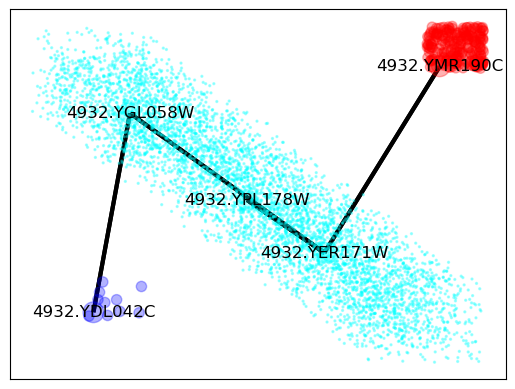

In [34]:
#for i in comm_func_similar : 
    #print(i.split(" ")[-1]) 
tmp_G(Apath , basket) 



In [33]:
2/0 

ZeroDivisionError: division by zero

In [ ]:
############################################### 
############### VOID ############### 
######################### 

In [ ]:
def whe_link(node_name , a_raw_commu) : 
    for i in a_raw_commu : 
        if G.has_edge(i , node_name) : 
#            print(i) 
            return True 
    return False 



commus_connections = [] 

tmp_c = 0 
for i in self_def_commus : 
    opened_box = [i , None] 
    info_pack = [0]*len(self_def_commus) 
    for ii in i : 
        for iii in self_def_commus : 
            if iii == i : 
                info_pack[self_def_commus.index(iii)] = -1 
                continue 
            if whe_link(ii , iii) : 
                
                info_pack[s_CommuNber(iii)] += 1 
    closed_box = [i , info_pack]
    commus_connections.append(closed_box) 
    tmp_c += 1 
    print(str(tmp_c) + " packed" , end="\r") 

In [ ]:


commu_G = nx.Graph() 
tmp_size = [] 
tmp_colour = [] 
tmp_width = [] 

tmp_i = 0 
for i in self_def_commus : 
    commu_G.add_node(i) 
    if "4932.YDL042C" in i : 
        print(tmp_i) 
    tmp_i += 1 


In [ ]:
for i in commus_connections : 
    for ii in range(len(i[1])) : 
        if i[1][ii] > 0 : 
            commu_G.add_edge(s_CommuNber(i[0]) , ii , weight=i[1][ii]) 

colour_ptr = 0 
for i in commu_G : 
#    print(len(CommuAt(i)) , "\t" , len(CommuAt(i))/len(G)) 
    #tmp_size.append(2**(13)*len(CommuAt(i))/len(G)) 
    if len(CommuAt(i)) > 87 : 
        tmp_colour.append(ccolours[colour_ptr]) 
        colour_ptr += 1 
    else : 
        tmp_colour.append("black") 
    tmp_n = 100*(len(CommuAt(i))/len(G))
    tmp_size.append(tmp_n**(3))  
#print(tmp_size) 
maxi_weight = -1 
for i in commu_G.edges(data=True) : 
    if i[2]["weight"] > maxi_weight : 
        maxi_weight = i[2]["weight"] 

for i in commu_G.edges(data=True) : 
    tmp_width.append((i[2]["weight"]/maxi_weight)**(1.87)) 


pos = None 

#pos = nx.bfs_layout(commu_G , 0) 
#pos = nx.spectral_layout(commu_G) 
##pos = nx.spring_layout(commu_G) 
##pos = nx.circular_layout(commu_G) 
##pos = nx.shell_layout(commu_G) 
##pos = nx.spring_layout(commu_G) 
pos = nx.kamada_kawai_layout(commu_G) 
##pos = nx.spiral_layout(commu_G) 

nx.draw(commu_G , pos=pos , with_labels=1 , font_size = 7 , width=tmp_width , alpha = 0.7 , node_color=tmp_colour , node_size=tmp_size) 

#recall SGS1 lives in 15_Commu 

In [ ]:


#G = nx.davis_southern_women_graph()  # Example graph
G = G.subgraph(AA[0] + AA[1] + AA[2]) 
#communities = nx.community.greedy_modularity_communities(G)
coomunities = AA 

print(len(G)) 

# Compute positions for the node clusters as if they were themselves nodes in a
# supergraph using a larger scale factor
supergraph = nx.cycle_graph(len(communities))
superpos = nx.spring_layout(G, scale=50, seed=429)

# Use the "supernode" positions as the center of each node cluster
centers = list(superpos.values())
pos = {}
for center, comm in zip(centers, communities):
    pos.update(nx.spring_layout(nx.subgraph(G, comm), center=center, seed=1430))

# Nodes colored by cluster
#for nodes, clr in zip(communities, ("tab:blue", "tab:orange", "tab:green")):
#nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes, node_color=clr, node_size=100)

nx.draw_networkx_edges(G, pos=pos)
#plt.tight_layout()
plt.show()




In [ ]:
    ccolour_map = [] 
    no_size_map = [] 
    l_thick_map = [] 
    l_color_map = [] 
    for i in sub_G : 
        if i in path : 
            ccolour_map.append("cyan") 
            no_size_map.append(111) 
        elif all_node_info[i][1] in commus_pack : 
            ccolour_map.append(ccolours[commus_pack.index(all_node_info[i][1])]) 
            no_size_map.append(50) 
        else : 
            ccolour_map.append("white") 
            no_size_map.append(2) 
    for i in sub_G.edges() : 
        if i in essen_edges : 
            #print("FLAG") 
            l_thick_map.append(3) 
            l_color_map.append("black") 
        else : 
            l_thick_map.append(0.02) 
            l_color_map.append("magenta") 
        

In [ ]:
        
    supergraph = nx.cycle_graph(len(tmp_commus))
    superpos = nx.spring_layout(G, scale=22)

    centers = list(superpos.values()) 
    centres = [[1,1] , [1,-1] , [-1,-1]] 
    pos = {}
    for center, comm in zip(centers, tmp_commus):
        pos.update(nx.spring_layout(nx.subgraph(G, comm), center=center))
